First 5 rows of the dataset:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good



Dataset Shape (Rows, Columns):
(5000, 10)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 371.2+ KB

Missing Values in Each Column:
Temperature 

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


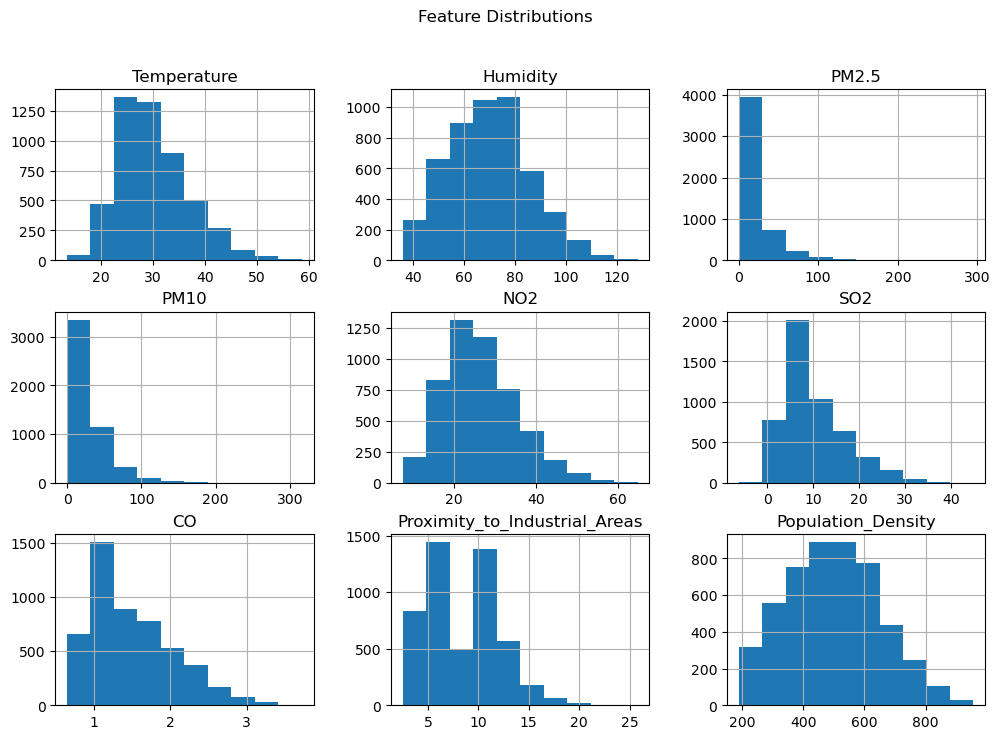

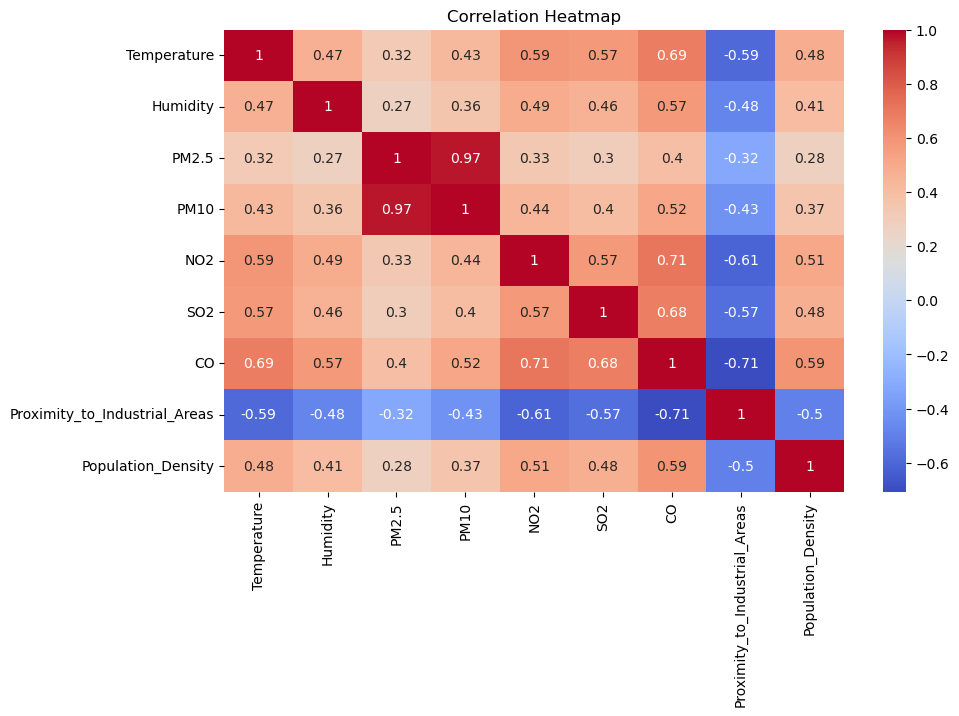


Number of potential outliers in each column:
Temperature                       72
Humidity                          19
PM2.5                            352
PM10                             324
NO2                               73
SO2                              124
CO                                45
Proximity_to_Industrial_Areas     16
Population_Density                 7
dtype: int64

Features shape: (5000, 9)
Target shape: (5000,)

Final cleaned dataset preview:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
# TASK 1: EXPLORATORY DATA ANALYSIS (EDA) AND PREPROCESSING

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# -------------------------------
# 1. Load Dataset
# -------------------------------
data = pd.read_csv("updated_pollution_dataset.csv")

print("First 5 rows of the dataset:")
display(data.head())

# -------------------------------
# 2. Dataset Shape and Info
# -------------------------------
print("\nDataset Shape (Rows, Columns):")
print(data.shape)

print("\nDataset Information:")
data.info()

# -------------------------------
# 3. Check Missing Values
# -------------------------------
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

print("\nDataset shape after removing missing values:")
print(data.shape)

# -------------------------------
# 4. Statistical Summary
# -------------------------------
print("\nStatistical Summary:")
display(data.describe())

# -------------------------------
# 5. Feature Distribution (Histogram)
# -------------------------------
# We only plot numeric columns to avoid errors
data.select_dtypes(include=[np.number]).hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

# -------------------------------
# 6. Correlation Analysis (FIXED)
# -------------------------------
plt.figure(figsize=(10, 6))
# Added numeric_only=True to ignore text columns
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 7. Outlier Detection using IQR (FIXED)
# -------------------------------
# We only calculate IQR for numeric columns
numeric_data = data.select_dtypes(include=[np.number])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers only in numeric columns
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of potential outliers in each column:")
print(outliers)

# -------------------------------
# 8. Feature and Target Separation
# -------------------------------
X = data.drop(columns=["Air Quality"])
y = data["Air Quality"]

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)

print("\nFinal cleaned dataset preview:")
display(data.head())

Using column 'Temperature' for numerical plotting.


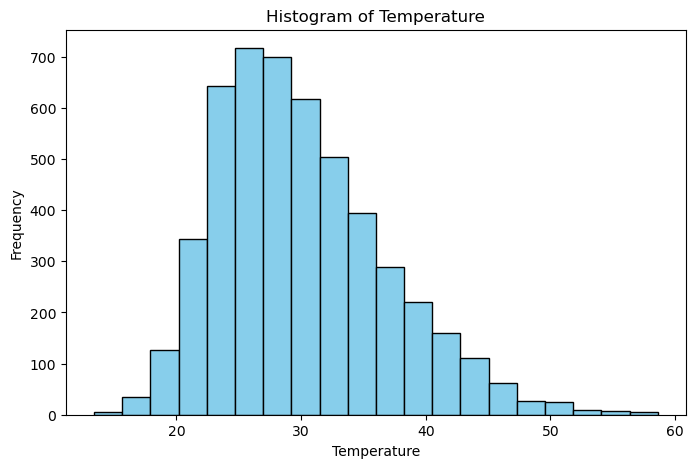

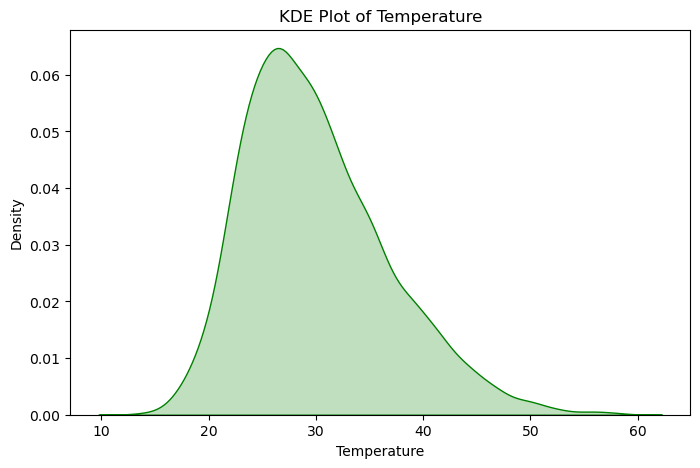

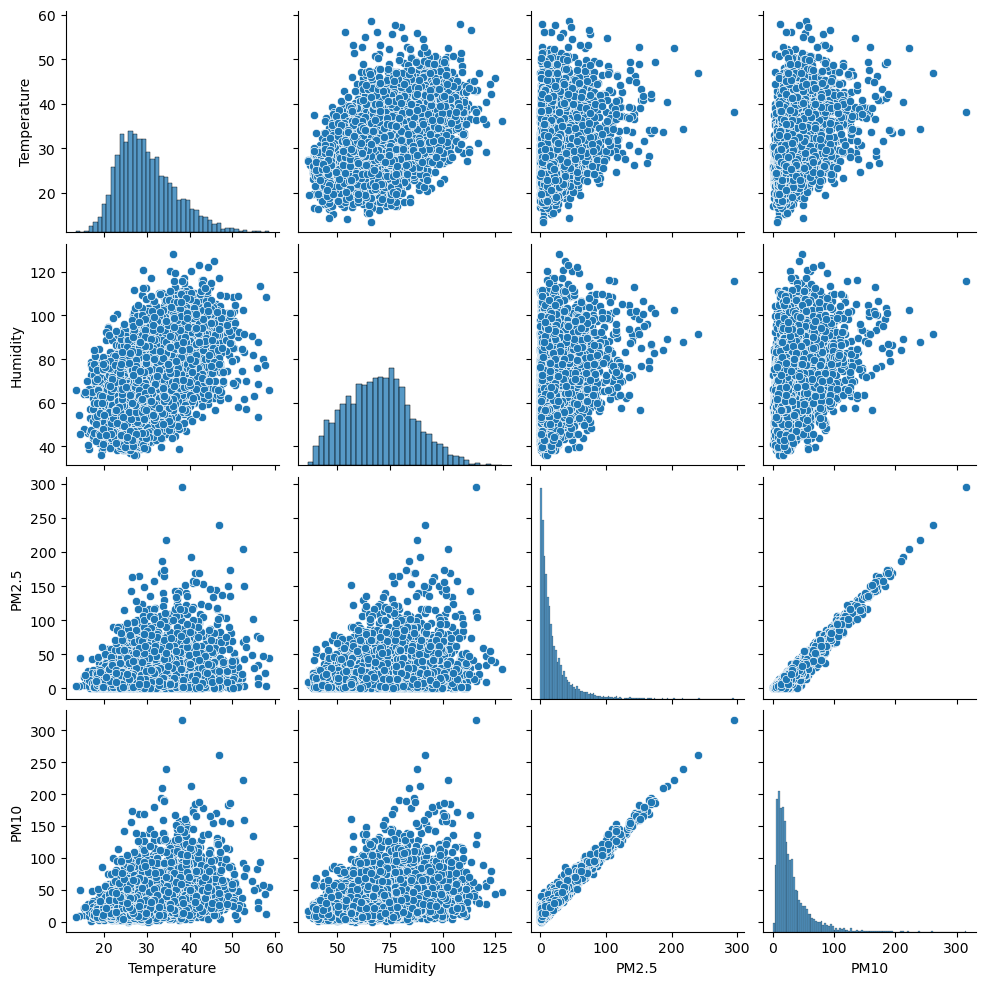

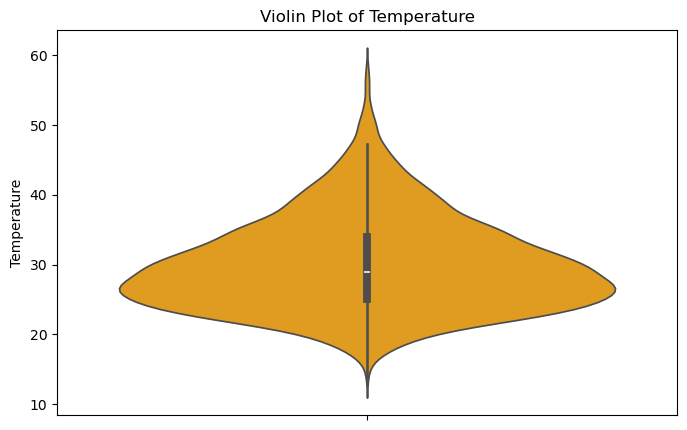

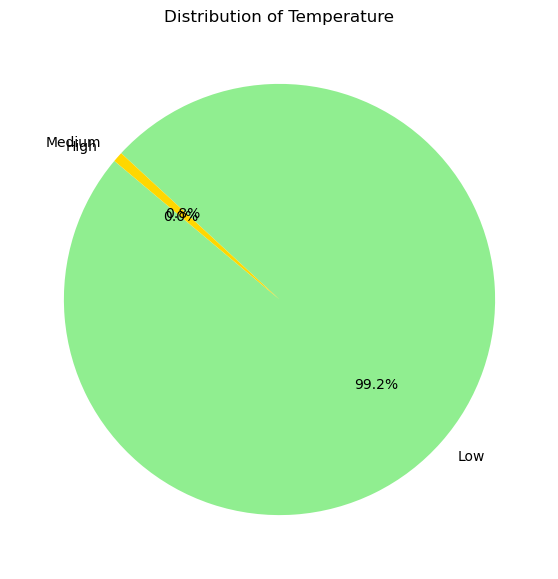

In [15]:
# TASK 2: ADVANCED VISUALIZATIONS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and clean headers
data = pd.read_csv("updated_pollution_dataset.csv")
data.columns = data.columns.str.strip()
data = data.dropna()

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

if 'Air Quality Index' in numeric_cols:
    target_col = 'Air Quality Index'
elif 'Air Quality' in numeric_cols:
    target_col = 'Air Quality'
elif len(numeric_cols) > 0:

    target_col = numeric_cols[0] 
else:
    raise ValueError("No numerical columns found in the dataset!")

print(f"Using column '{target_col}' for numerical plotting.")

# -------------------------------
# 1. Histogram
# -------------------------------
plt.figure(figsize=(8, 5))
plt.hist(data[target_col], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Histogram of {target_col}")
plt.xlabel(target_col)
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 2. KDE Plot
# -------------------------------


plt.figure(figsize=(8, 5))
sns.kdeplot(data[target_col], fill=True, color="green")
plt.title(f"KDE Plot of {target_col}")
plt.xlabel(target_col)
plt.show()

# -------------------------------
# 3. Pair Plot
# -------------------------------

sns.pairplot(data[numeric_cols[:4]])
plt.show()

# -------------------------------
# 4. Violin Plot
# -------------------------------

plt.figure(figsize=(8, 5))
sns.violinplot(y=data[target_col], color="orange")
plt.title(f"Violin Plot of {target_col}")
plt.ylabel(target_col)
plt.show()

# -------------------------------
# 5. Pie Chart
# -------------------------------

labels = ["Low", "Medium", "High"]
low = len(data[data[target_col] <= 50])
medium = len(data[(data[target_col] > 50) & (data[target_col] <= 100)])
high = len(data[data[target_col] > 100])

sizes = [low, medium, high]

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=["lightgreen", "gold", "tomato"])
plt.title(f"Distribution of {target_col}")
plt.show()

--- Decision Tree Regressor Performance ---
Mean Absolute Error (MAE): 0.1118
Mean Squared Error (MSE):  0.0680
R-squared Score (R2):      0.9346

--- Random Forest Regressor Performance (Comparison) ---
MAE: 0.1087
R2:  0.9468


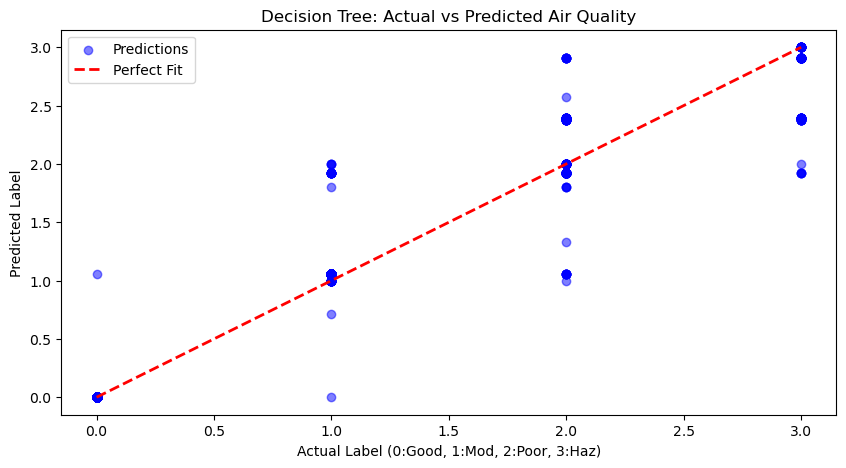

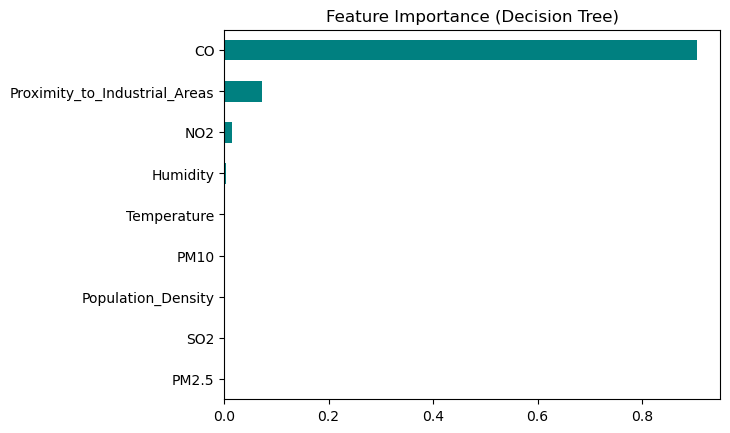

In [16]:
# ---------------------------------------------------------
# TASK 3: ALGORITHM APPLICATION (DECISION TREE REGRESSOR)
# ---------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Load and Preprocess Dataset
data = pd.read_csv("updated_pollution_dataset.csv")
data.columns = data.columns.str.strip()
data = data.dropna()

# 2. Encode categorical Target
mapping = {'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3}
data['Air Quality Label'] = data['Air Quality'].map(mapping)

# 3. Feature and Target Separation
X = data.drop(columns=['Air Quality', 'Air Quality Label'])
y = data['Air Quality Label']

# 4. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 5. Apply Decision Tree Regressor
# ---------------------------------------------------------
# Hyperparameters Selection:
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_regressor.predict(X_test)

# ---------------------------------------------------------
# 6. Evaluation Metrics
# ---------------------------------------------------------
print("--- Decision Tree Regressor Performance ---")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Mean Squared Error (MSE):  {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"R-squared Score (R2):      {r2_score(y_test, y_pred_dt):.4f}")

# ---------------------------------------------------------
# 7. Additional Algorithm: Random Forest Regressor (Comparison)
# ---------------------------------------------------------
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

print("\n--- Random Forest Regressor Performance (Comparison) ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"R2:  {r2_score(y_test, y_pred_rf):.4f}")

# ---------------------------------------------------------
# 8. Visualizing Results
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))

# Plotting Actual vs Predicted for Decision Tree
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title("Decision Tree: Actual vs Predicted Air Quality")
plt.xlabel("Actual Label (0:Good, 1:Mod, 2:Poor, 3:Haz)")
plt.ylabel("Predicted Label")
plt.legend()
plt.show()

# Feature Importance Plot
importances = pd.Series(dt_regressor.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (Decision Tree)")
plt.show()

In [4]:
%pip install seaborn
